In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import constraints

%matplotlib inline

In [2]:
data_path = "/Users/johngargalionis/Dropbox/PhD/theOneLQ/LQ/data/"
scan1_data = pd.read_csv(data_path+"scan1.csv")
scan2_data = pd.read_csv(data_path+"scan2.csv")

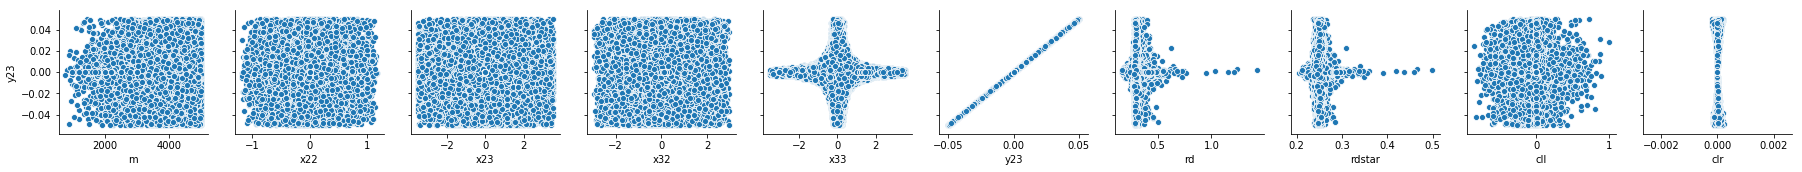

In [22]:
keys = list(scan2_data.keys())
keys.remove('y32')
pp = sns.pairplot(data=scan2_data, y_vars=['y23'], x_vars=keys)

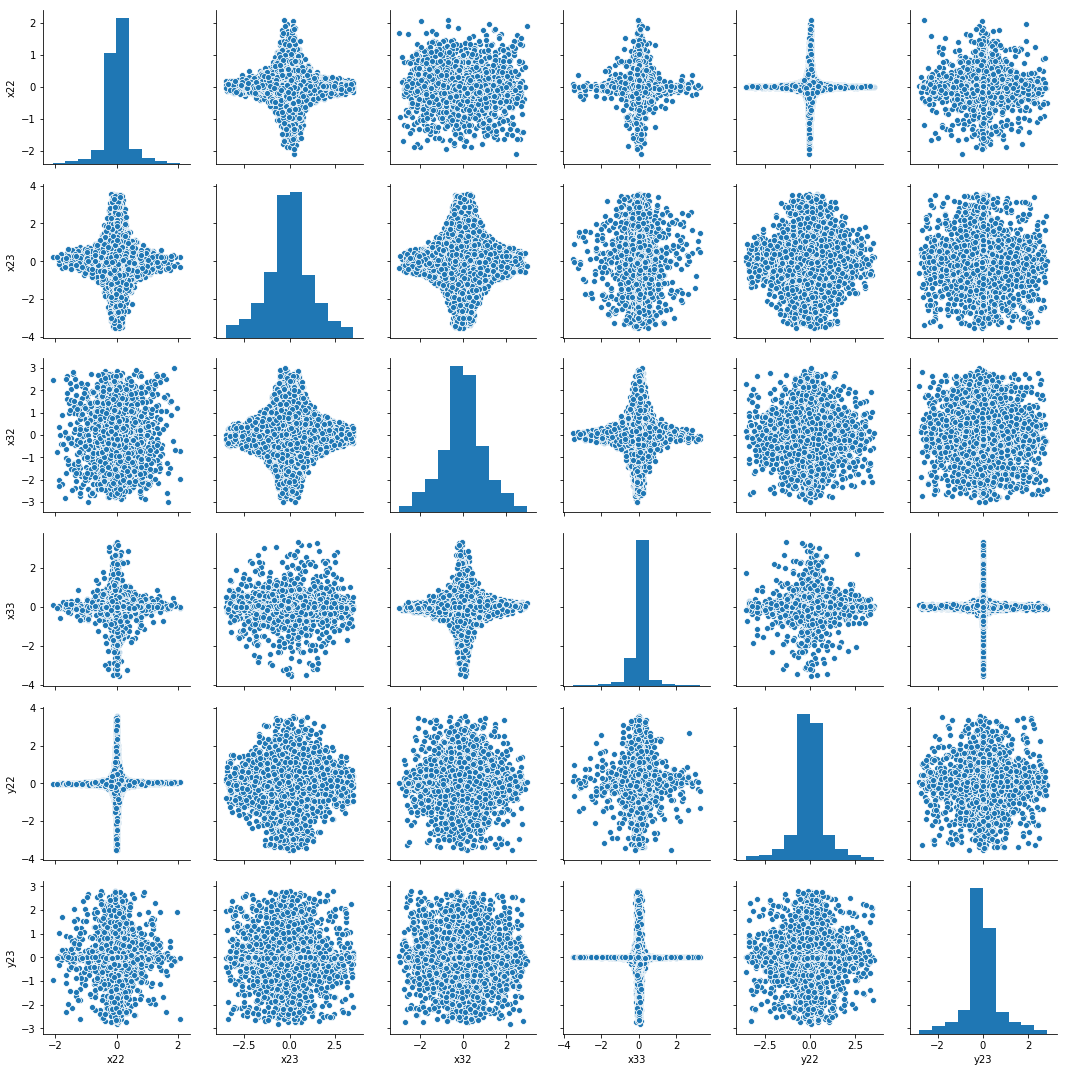

In [18]:
couplings = ['x22', 'x23', 'x32', 'x33', 'y22', 'y23']
sns.pairplot(data=scan1_data, x_vars=couplings, y_vars=couplings)

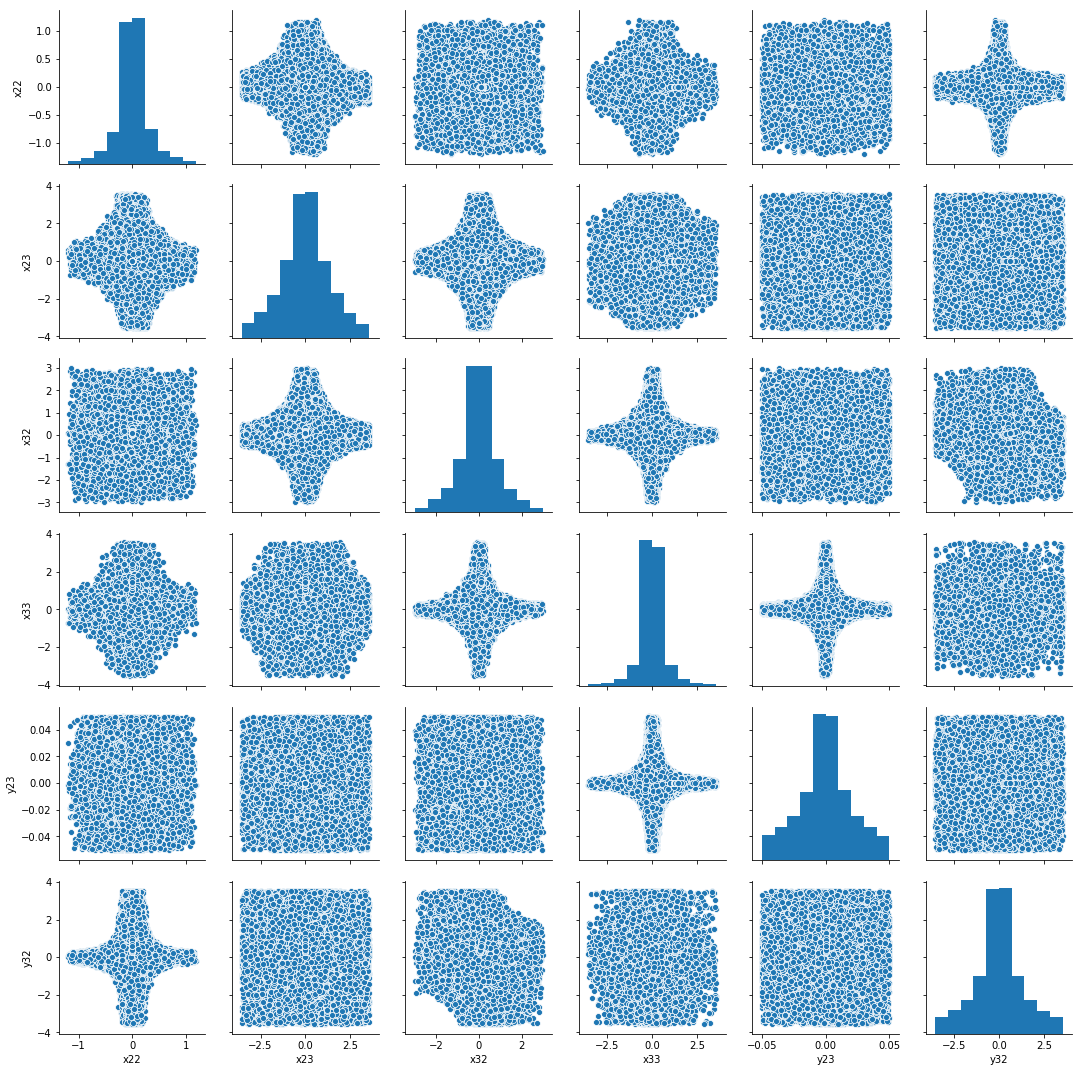

In [20]:
couplings = ['x22', 'x23', 'x32', 'x33', 'y23', 'y32']
sns.pairplot(data=scan2_data, x_vars=couplings, y_vars=couplings)

## Scan 1 plots

In [3]:
scan1_data[:5]

,m,x22,x23,x32,x33,y22,y23,cll,clr
0,4651.798464,-0.010023,-0.003004,-0.479517,-0.073089,2.377866,-0.581192,3.696084e-07,0.020018
1,3707.761125,0.095181,-2.273928,0.153328,-0.463626,-0.276561,0.006002,-1.502088e-01,-0.002956
2,3718.929308,0.004585,0.016941,-0.401523,-0.276684,-1.335782,0.016008,7.280120e-06,0.026497
3,4344.362556,0.059767,-0.343789,-1.807793,-0.046182,0.884891,1.174150,1.597114e-03,0.023038
4,3209.718534,-0.037109,0.019127,1.146775,0.054831,-0.281333,0.542221,2.499902e-05,0.007958


In [ ]:
%%time

rknunu_list = []
cbs_list = []
Dsmunu_list = []
Bmunu_list = []
rd_list = []
rdstar_list = []
x33_x23_rat_list = []
rdmue_list = []
rdstaremu_list = []

for idx, row in enumerate(scan1_data.values):
    if idx % 1000 == 0:
        print(f"{100 * idx / len(scan1_data.values)}%")
        
    m, x22, x23, x32, x33, y22, y23, cll, clr = row
    
    X = np.matrix([[0, 0,   0  ], 
                   [0, x22, x23],
                   [0, x32, x33]])
    
    Y = np.matrix([[0, 0,   0  ], 
                   [0, y22, y23], 
                   [0, 0,   0  ]])
    
    rknunu = constraints.rknunu(m, X)
    rknunu_list.append(rknunu)
    
    cbs = constraints.cbs(m, X)
    cbs_list.append(cbs)
    
    Dsmunu = constraints.Dsmunu(m, X, Y)
    Dsmunu_list.append(Dsmunu)
    
    Bmunu = constraints.Bmunu(m, X, Y)
    Bmunu_list.append(Bmunu)
    
    rdrdstar = constraints.all_rdstar_ratios(m, X, Y)
    rd_list.append(rdrdstar[0])
    rdstar_list.append(rdrdstar[1])
    rdmue_list.append(rdrdstar[2])
    rdstaremu_list.append(1/rdrdstar[3])
    
    x33_x23_rat_list.append(x33 / x23)

0.0%


In [5]:
df = scan1_data

df.insert(loc=len(df.columns), column='rknunu', value=rknunu_list)
df.insert(loc=len(df.columns), column='cbs', value=cbs_list)
df.insert(loc=len(df.columns), column='Dsmunu', value=Dsmunu_list)
df.insert(loc=len(df.columns), column='Bmunu', value=Bmunu_list)
df.insert(loc=len(df.columns), column='rd', value=rd_list)
df.insert(loc=len(df.columns), column='rdstar', value=rdstar_list)
df.insert(loc=len(df.columns), column='x33x23', value=x33_x23_rat_list)
df.insert(loc=len(df.columns), column='rdmue', value=rdmue_list)
df.insert(loc=len(df.columns), column='rdstaremu', value=rdstaremu_list)

ValueError: Length of values does not match length of index

In [6]:
filtered = df[
    (df.rknunu < 2.7) &
    (df.cbs < 1.11 + 2*0.09) &
    (df.cbs > 1.11 - 2*0.09) &
    (df.Dsmunu < (5.49 + 2*0.16)*1e-3) &
    (df.Dsmunu > (5.49 - 2*0.16)*1e-3) &
    (df.Bmunu > 2.9e-7) &
    (df.Bmunu < 10.7e-7)
]

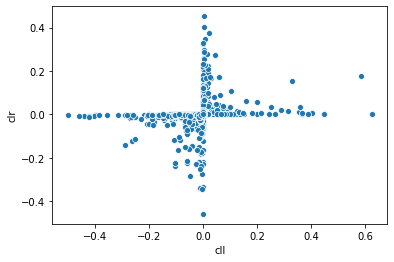

In [7]:
sns.scatterplot(data=filtered, x="cll", y="clr")

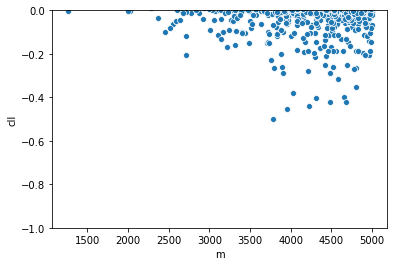

In [8]:
sns.scatterplot(data=filtered, x="m", y="cll")
plt.ylim(-1,0);

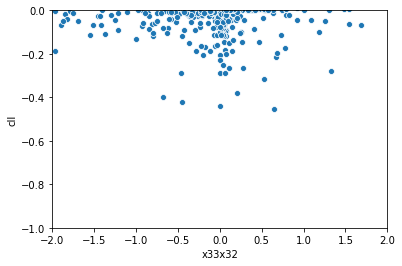

In [12]:
sns.scatterplot(data=filtered, x="x33x23", y="cll")
plt.ylim(-1,0);
plt.xlim(-2,2);

## Scan 2 plots

In [3]:
scan2_data[:5]

,m,x22,x23,x32,x33,y23,y32,rd,rdstar,cll,clr
0,4668.630337,0.048727,1.020077,-1.140665,0.113449,-0.008441,-1.545500,0.289916,0.246247,-0.000726,-2.636274e-07
1,3531.303849,0.174817,-1.991409,0.036886,-1.254581,-0.004780,-0.663449,0.318209,0.256292,-0.191247,-1.212576e-06
2,2854.994921,0.038620,-1.042859,-0.171767,0.474347,-0.009093,3.296845,0.375894,0.265093,-0.012284,-1.606130e-06
3,4284.105129,-0.048423,-0.486475,1.957728,0.049708,-0.045251,-1.908189,0.292526,0.248650,0.004614,3.233219e-05
4,4775.659133,0.715676,0.508992,0.033603,0.569758,0.014382,0.187614,0.291276,0.245959,0.025323,7.026240e-06


In [4]:
%%time

rknunu_list = []
cbs_list = []
Dsmunu_list = []
Bmunu_list = []
rd_list = []
rdstar_list = []
x33_x23_rat_list = []

for idx, row in enumerate(scan2_data.values):
    if idx % 1000 == 0:
        print(f"{100 * idx / len(scan2_data.values)}%")
        
    m, x22, x23, x32, x33, y23, y32, _, _, cll, clr = row
    
    X = np.matrix([[0, 0,   0  ], 
                   [0, x22, x23],
                   [0, x32, x33]])
    
    Y = np.matrix([[0, 0,   0  ], 
                   [0, 0,   y23], 
                   [0, y32, 0  ]])
    
    rknunu = constraints.rknunu(m, X)
    rknunu_list.append(rknunu)
    
    cbs = constraints.cbs(m, X)
    cbs_list.append(cbs)
    
    Dsmunu = constraints.Dsmunu(m, X, Y)
    Dsmunu_list.append(Dsmunu)
    
    Bmunu = constraints.Bmunu(m, X, Y)
    Bmunu_list.append(Bmunu)
    
    rdrdstar = constraints.rdstar_ratios(m, X, Y)
    rd_list.append(rdrdstar[0])
    rdstar_list.append(rdrdstar[1])
    
    x33_x23_rat_list.append(x33 / x23)

0.0%
2.7109821888470194%
5.421964377694039%
8.132946566541058%
10.843928755388077%
13.554910944235097%
16.265893133082116%
18.976875321929136%
21.687857510776155%
24.398839699623174%
27.109821888470194%
29.820804077317213%
32.53178626616423%
35.24276845501125%
37.95375064385827%
40.66473283270529%
43.37571502155231%
46.08669721039933%
48.79767939924635%
51.50866158809337%
54.21964377694039%
56.93062596578741%
59.641608154634426%
62.352590343481445%
65.06357253232846%
67.77455472117548%
70.4855369100225%
73.19651909886952%
75.90750128771654%
78.61848347656355%
81.32946566541058%
84.0404478542576%
86.75143004310462%
89.46241223195163%
92.17339442079866%
94.88437660964567%
97.5953587984927%


<timed exec>:39: RuntimeWarning: divide by zero encountered in double_scalars


CPU times: user 1h 50min 36s, sys: 10min 15s, total: 2h 52s
Wall time: 1h 17min 55s


In [8]:
df2 = scan2_data

df2.insert(loc=len(df2.columns), column='rknunu', value=rknunu_list)
df2.insert(loc=len(df2.columns), column='cbs', value=cbs_list)
df2.insert(loc=len(df2.columns), column='Dsmunu', value=Dsmunu_list)
df2.insert(loc=len(df2.columns), column='Bmunu', value=Bmunu_list)
df2.insert(loc=len(df2.columns), column='rd_flav', value=rd_list)
df2.insert(loc=len(df2.columns), column='rdstar_flav', value=rdstar_list)
df2.insert(loc=len(df2.columns), column='x33x23', value=x33_x23_rat_list)

In [9]:
df2

,m,x22,x23,x32,x33,y23,y32,rd,rdstar,cll,clr,rknunu,cbs,Dsmunu,Bmunu,rd_flav,rdstar_flav,x33x32
0,4668.630337,0.048727,1.020077,-1.140665,0.113449,-0.008441,-1.545500,0.289916,0.246247,-0.000726,-2.636274e-07,2.931916,1.002248,0.005324,3.370467e-07,0.294048,0.242297,-0.099459
1,3531.303849,0.174817,-1.991409,0.036886,-1.254581,-0.004780,-0.663449,0.318209,0.256292,-0.191247,-1.212576e-06,0.833015,1.097009,0.005324,3.379475e-07,0.316243,0.259581,-34.012376
2,2854.994921,0.038620,-1.042859,-0.171767,0.474347,-0.009093,3.296845,0.375894,0.265093,-0.012284,-1.606130e-06,0.974386,1.014231,0.005324,3.356117e-07,0.367164,0.298165,-2.761568
3,4284.105129,-0.048423,-0.486475,1.957728,0.049708,-0.045251,-1.908189,0.292526,0.248650,0.004614,3.233219e-05,3.127683,1.006156,0.005324,3.396640e-07,0.298013,0.245641,0.025391
4,4775.659133,0.715676,0.508992,0.033603,0.569758,0.014382,0.187614,0.291276,0.245959,0.025323,7.026240e-06,1.923646,1.049696,0.005327,3.378707e-07,0.298538,0.245940,16.955488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36882,1200.000000,0.000000,0.000000,0.050000,1.300000,0.000000,0.350000,0.414552,0.291761,0.000000,0.000000e+00,3.827162,1.023588,0.005324,3.612238e-07,0.429424,0.356023,26.000000
36883,1400.000000,0.000000,0.000000,0.060000,1.300000,0.000000,0.400000,0.392899,0.283561,0.000000,0.000000e+00,3.342138,1.024831,0.005324,3.565046e-07,0.404811,0.334494,21.666667
36884,1400.000000,0.000000,0.000000,0.060000,1.300000,0.000000,0.600000,0.441846,0.295570,0.000000,0.000000e+00,3.342138,1.024831,0.005324,3.565046e-07,0.448571,0.370770,21.666667
36885,1600.000000,0.000000,0.000000,0.090000,1.400000,0.000000,0.700000,0.438543,0.295034,0.000000,0.000000e+00,4.224713,1.049398,0.005324,3.580277e-07,0.447251,0.368464,15.555556


In [23]:
filtered = df2[
    (df2.rknunu < 2.7) &
    (df2.cbs < 1.11 + 2*0.09) &
    (df2.cbs > 1.11 - 2*0.09) &
    (df2.Dsmunu < (5.49 + 2*0.16)*1e-3) &
    (df2.Dsmunu > (5.49 - 2*0.16)*1e-3) &
    (df2.Bmunu > 2.9e-7) &
    (df2.Bmunu < 10.7e-7)
]

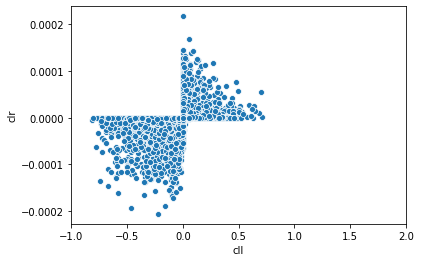

In [24]:
sns.scatterplot(data=filtered, x="cll", y="clr")
plt.xlim(-1,2);

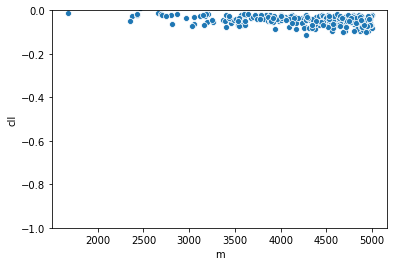

In [14]:
sns.scatterplot(data=filtered, x="m", y="cll")
plt.ylim(-1,0);

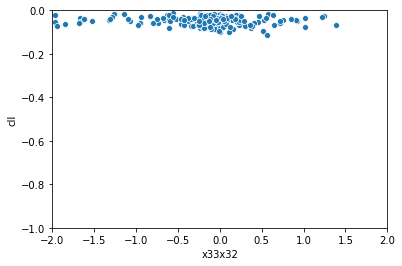

In [15]:
sns.scatterplot(data=filtered, x="x33x23", y="cll")
plt.ylim(-1,0);
plt.xlim(-2,2);